In [2]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [17]:
titles['title'].value_counts()

Hamlet                           19
Carmen                           14
Macbeth                          14
The Three Musketeers             12
Maya                             11
Surrender                        10
She                              10
Love                             10
Honeymoon                        10
Othello                          10
Anna Karenina                    10
Kismet                           10
Temptation                       10
The Outsider                     10
Blood Money                      10
Borderline                        9
Underground                       9
Anna                              9
Vendetta                          9
Trapped                           9
Hero                              9
Vengeance                         9
Madame X                          9
The Drifter                       9
The Promise                       9
Rage                              9
Paradise                          9
Hide and Seek               

### Which three years of the 1930s saw the most films released?

In [19]:
titles[(titles.year <= 1939) & (titles.year >= 1930)].year.value_counts().head(3)

1937    1189
1936    1131
1938    1116
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [29]:
decades = titles.year // 10 *10
decades.value_counts()

2010    56983
2000    38024
1990    21629
1980    19474
1970    17931
1960    16792
1950    12175
1930     9991
1920     8682
1940     8352
1910     6389
2020       74
1900       36
1890        4
Name: year, dtype: int64

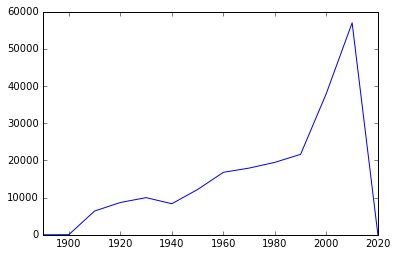

In [35]:
decades.value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

In [40]:
hamlets = titles[titles.title.str.startswith("Hamlet")]
decades = hamlets.year // 10 * 10

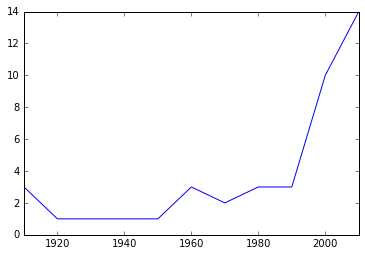

In [41]:
decades.value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

### Plot the number of "Hamlet" characters each decade.

### What are the 11 most common character names in movie history?

### Who are the 10 people most often credited as "Herself" in film history?

### Who are the 10 people most often credited as "Himself" in film history?

### Which actors or actresses appeared in the most movies in the year 1945?

### Which actors or actresses appeared in the most movies in the year 1985?

### Plot how many roles Mammootty has played in each year of his career.

### What are the 10 most frequent roles that start with the phrase "Patron in"?

### What are the 10 most frequent roles that start with the word "Science"?

### Plot the n-values of the roles that Judi Dench has played over her career.

### Plot the n-values of Cary Grant's roles through his career.

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?